El objetivo es abrir el archivo **'prueba_grafo.pickle'**, y convertirlo en un dataset que pueda ser absorvido por pythorch geometic.<br>

Habrá que cargar el pickle :
- generar lista con los edges.
- generar una comunidades.
- ejecutar la red neuronal a ver que sale

In [1]:
import pickle
## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)


G = pickle.load(open('prueba_grafo.pickle', 'rb'))

/home/data/Documents/CursoIA/Jupiter/.Jupiter/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


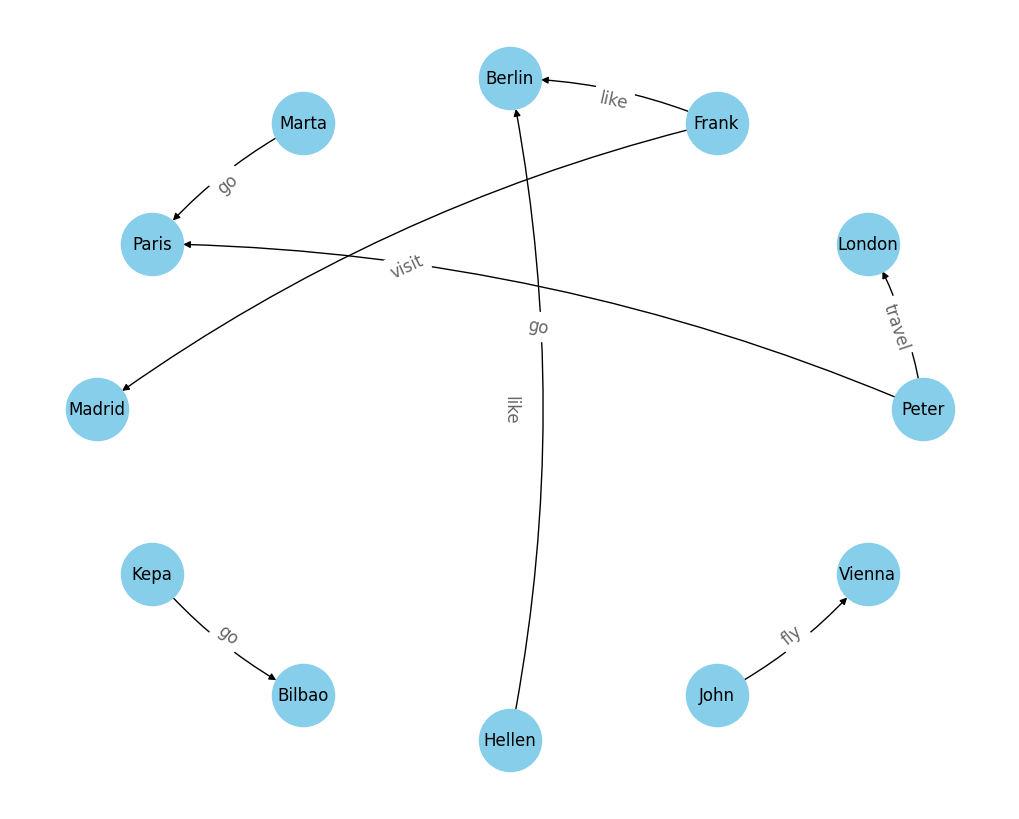

In [2]:
# lo visualizamos
## plot como lo hace el tutorial
plt.figure(figsize=(10,8))

pos = nx.circular_layout(G, )
node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()


In [3]:
from typing import Callable, Optional

import torch

from torch_geometric.data import Data, InMemoryDataset

import torch.nn.functional as fun

In [18]:
# generar el tensor con los edges 

print(G.edges())
aristas = G.edges()
for tuple in aristas:
    print(tuple[0],tuple[1])
encoded_G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_label')
print(f"encoded:{nx.get_node_attributes(encoded_G,'old_label')}")
print(f"peter is : {[k for k,v in nx.get_node_attributes(encoded_G,'old_label').items() if v=='Peter']}")
print(f" '0' es :{nx.get_node_attributes(encoded_G,'old_label')[0]}")
#keys = [k for k, v in d.items() if v == 'aaa']
rows, cols = map(list, zip(*encoded_G.edges()))
print(rows)

print(cols)
edge_index = torch.tensor([rows,cols])
print(edge_index)
nx.get_node_attributes(encoded_G,'old_label')

[('Peter', 'London'), ('Peter', 'Paris'), ('Frank', 'Berlin'), ('Frank', 'Madrid'), ('Marta', 'Paris'), ('Kepa', 'Bilbao'), ('Hellen', 'Berlin'), ('John', 'Vienna')]
Peter London
Peter Paris
Frank Berlin
Frank Madrid
Marta Paris
Kepa Bilbao
Hellen Berlin
John Vienna
encoded:{0: 'Peter', 1: 'London', 2: 'Frank', 3: 'Berlin', 4: 'Marta', 5: 'Paris', 6: 'Madrid', 7: 'Kepa', 8: 'Bilbao', 9: 'Hellen', 10: 'John', 11: 'Vienna'}
peter is : [0]
 '0' es :Peter
[0, 0, 2, 2, 4, 7, 9, 10]
[1, 5, 3, 6, 5, 8, 3, 11]
tensor([[ 0,  0,  2,  2,  4,  7,  9, 10],
        [ 1,  5,  3,  6,  5,  8,  3, 11]])


{0: 'Peter',
 1: 'London',
 2: 'Frank',
 3: 'Berlin',
 4: 'Marta',
 5: 'Paris',
 6: 'Madrid',
 7: 'Kepa',
 8: 'Bilbao',
 9: 'Hellen',
 10: 'John',
 11: 'Vienna'}

In [22]:
# generar un las comunidades, lo hago manualmente
y = torch.tensor([  # Create communities.
            0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1
        ])
print(y)

tensor([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])


In [23]:
# información de los nodos, no hay nada pues la matriz diagonal
x1 = torch.eye(y.size(0), dtype=torch.float)

In [24]:
# generamos las máscaras 1 por clase
# Select a single training node for each community
# (we just use the first one).
train_mask = torch.zeros(y.size(0), dtype=torch.bool)
for i in range(int(y.max()) + 1):
    train_mask[(y == i).nonzero(as_tuple=False)[0]] = True
print(train_mask)

tensor([ True,  True, False, False, False, False, False, False, False, False,
        False, False])


In [26]:
# lo metemos en el data
data = Data(x=x1, edge_index=edge_index, y=y, train_mask=train_mask)
print(data)

Data(x=[12, 12], edge_index=[2, 8], y=[12], train_mask=[12])


## Todo junto, genrando una clase 'prueba1', que importa una copia de 'grafo_prueba'
Lo anterior era un poco de prueba. El código válido empieza aquí.<br>
A esto habría que sumarle los "import".

In [44]:
from typing import Callable, Optional

import torch

from torch_geometric.data import Data, InMemoryDataset

import torch.nn.functional as fun


class prueba1(InMemoryDataset):
    r"""
    Args:
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.Data` object and returns a transformed
            version. The data object will be transformed before every access.
            (default: :obj:`None`)

    **STATS:**

    .. list-table::
        :widths: 10 10 10 10
        :header-rows: 1

        * - #nodes
          - #edges
          - #features
          - #classes
        * - 34
          - 156
          - 34
          - 4
    """
    def __init__(self, transform: Optional[Callable] = None):
        super().__init__('.', transform)

        G = pickle.load(open('prueba1.pickle', 'rb'))
        # generar el tensor con los edges 
        encoded_G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)
        rows, cols = map(list, zip(*encoded_G.edges()))
        edge_index = torch.tensor([rows,cols])

        # generar un las comunidades, lo hago manualmente
        y = torch.tensor([  # Create communities.
            0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1
        ])

        # información de los nodos, no hay nada pues la matriz diagonal
        x = torch.eye(y.size(0), dtype=torch.float)
        
        

        # Select a single training node for each community
        # (we just use the first one).
        train_mask = torch.zeros(y.size(0), dtype=torch.bool)
        for i in range(int(y.max()) + 1):
            train_mask[(y == i).nonzero(as_tuple=False)[0]] = True

        data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask)

        self.data, self.slices = self.collate([data])

In [45]:
dataset = prueba1()
print(f'Dataset: {dataset}:')
print('======================')

# There can be one or more number of graphs in a dataset
# In this case it is only 1.
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}') # 38 = 24 nodos + 4 classes

# Node labels are the labels of the community that the node ends up joining
# These labels are obtained by via modularity-based clustering
print(f'Number of classes: {dataset.num_classes}')

Dataset: prueba1():
Number of graphs: 1
Number of features: 12
Number of classes: 2


In [46]:
# no cambio el nombre por pereza y para ver que no es importante el nombre
karate_club = dataset[0]  # Get the dataset graph
print(karate_club)

Data(x=[12, 12], edge_index=[2, 8], y=[12], train_mask=[12])


In [47]:
print(f'Total number of nodes: {karate_club.num_nodes}')
print(f'Number of training nodes: {karate_club.train_mask.sum()}')
print(f'Training node label rate: {int(karate_club.train_mask.sum()) / karate_club.num_nodes:.2f}')

Total number of nodes: 12
Number of training nodes: 2
Training node label rate: 0.17


In [48]:
import torch
from torch.nn import Linear, Dropout, Tanh, ReLU # import the torch layers
torch.manual_seed(140) # for reproducibility


In [49]:
g_prueba = torch.Generator()
g_prueba

In [50]:
def accuracy(logits, labels):
    # find the accuracy 
    pred = torch.argmax(logits, dim=1)
    acc = torch.mean((pred == labels).float())
    return acc

In [51]:
from torch_geometric.nn import GCNConv

In [52]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[12, 12], edge_index=[2, 8], y=[12], train_mask=[12])
Number of nodes: 12
Number of edges: 8
Average node degree: 0.67
Number of training nodes: 2
Training node label rate: 0.17
Has isolated nodes: False
Has self-loops: False
Is undirected: False


In [53]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)


GCN(
  (conv1): GCNConv(12, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=2, bias=True)
)


In [54]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h, out # aquí he escrito out, originalmente no lo recogía


In [55]:
for epoch in range(401):
    loss, h, out_f = train(data) # aquí he escrito out_f, originalmente no lo recogía

In [56]:
acc_f = accuracy(out_f[data.train_mask], data.y[data.train_mask])
print(acc_f.item())

1.0


In [57]:
print(data.y[data.train_mask].tolist())

[0, 1]


In [58]:
print(data.y[data.train_mask].tolist())

[0, 1]


In [59]:
pred_total = torch.argmax(out_f, dim=1)
print(pred_total.tolist())
print(data.y.tolist())

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]


In [60]:
acierto_final = torch.mean((pred_total == data.y).float())
print(f"Acierto final : {acierto_final.item()}")

Acierto final : 0.5833333134651184


He conseguido llegar hasta el final y ejecutar sin errores.